In [28]:
%load_ext watermark
%watermark -n -u -v -iv -w -p numpy,pandas,matplotlib,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Thu Jul 27 2023

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

numpy     : 1.21.5
pandas    : 1.4.3
matplotlib: 3.5.2
seaborn   : 0.11.2

numpy     : 1.21.5
sklearn   : 1.1.1
matplotlib: 3.5.2
pandas    : 1.4.3

Watermark: 2.3.1



In [29]:
# Libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Data to be used is read:
data_cluster = pd.read_csv('./clustering data.csv')
data_cluster.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,y
0,-4.554889,4.100700,-3.134432,-1.313845,-9.391112,2.519540,1.308041,0.926173,7.067234,3.509057,3
1,10.766431,4.114985,-0.145851,6.064239,-4.482858,2.045298,-8.068677,7.231181,-1.361735,-1.031854,2
2,8.697494,6.927252,0.081115,8.782801,-6.016109,2.765242,-9.023664,9.352678,-1.699800,-0.519918,2
3,7.887380,0.888983,0.613888,6.976301,-11.153522,-5.858364,-12.793676,4.969787,1.399372,6.831188,1
4,3.432427,3.062779,0.881139,-0.040477,-4.844429,2.057529,-2.111636,8.952105,10.530478,-2.324382,0


In [31]:
# The database is divided between dependent and independent variables:
X_cluster = data_cluster.drop(columns = 'y')
y_cluster = data_cluster['y']

In [32]:
# The pipeline function is created to standardize data and perform PCA:
pipeline_pca = make_pipeline(
    StandardScaler(),
    PCA(random_state = 2022)
)
pipeline_pca.fit(X_cluster)

# The PCA model is stored:
pca_model = pipeline_pca.named_steps['pca']

In [33]:
# We review how much variance in the data is explained by each component:
print('Variance explained by each component: ', pca_model.explained_variance_ratio_)
print('Cumulative explained variance: ',np.cumsum(pca_model.explained_variance_ratio_))

Variance explained by each component:  [0.42983331 0.24328742 0.15279276 0.073514   0.03557019 0.01932543
 0.01357557 0.01344127 0.01013287 0.00852719]
Cumulative explained variance:  [0.42983331 0.67312072 0.82591348 0.89942748 0.93499767 0.9543231
 0.96789866 0.98133993 0.99147281 1.        ]


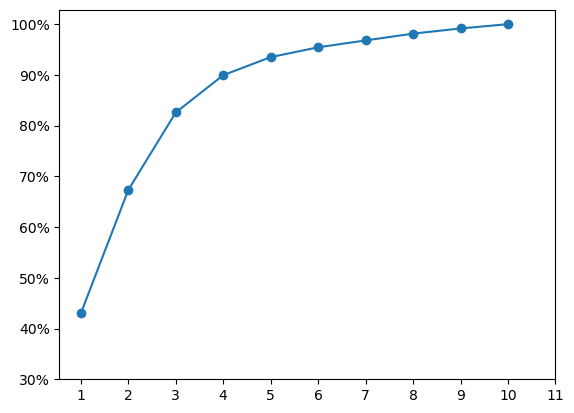

In [34]:
# The objective of this excercise is to achieve at least a 70% of explained variance, so 3 components are needed, which total 82.59% of explained variance
# Graphically:
import matplotlib.pyplot as plt
%config InlineBacked.figure_format = 'retina'
plt.style.use('default')
plt.plot(
    range(1, len(pca_model.components_) + 1),
    np.cumsum(pca_model.explained_variance_ratio_),
    marker = "o"
)
plt.xticks(
    ticks = np.arange(data_cluster.shape[1]) + 1,
)
plt.yticks(
    ticks  = np.linspace(0.3, 1, 8),
    labels = [f"{val:0.0%}" for val in np.linspace(0.3, 1, 8)]
);

In [35]:
# A pipeline function is created that considers 3 components:
pipeline_pca_3 = make_pipeline(
    StandardScaler(),
    PCA(n_components = 3, random_state = 2022)
)
pipeline_pca_3.fit(X_cluster)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=3, random_state=2022))])

In [36]:
# The projections obtained are standardized and stored:
projections = pipeline_pca_3.transform(X_cluster)
scaler = StandardScaler()
projections_std = scaler.fit_transform(projections)
projections_std

array([[-0.20689143,  1.21464137, -0.92270023],
       [-0.36803279, -0.56190066,  1.65110457],
       [-0.62164349, -0.33486894,  1.80334435],
       ...,
       [-0.51295722, -0.43618034,  1.04043958],
       [ 1.66835713, -1.03000512, -0.06518664],
       [-0.96535749, -1.64926866, -0.84543439]])

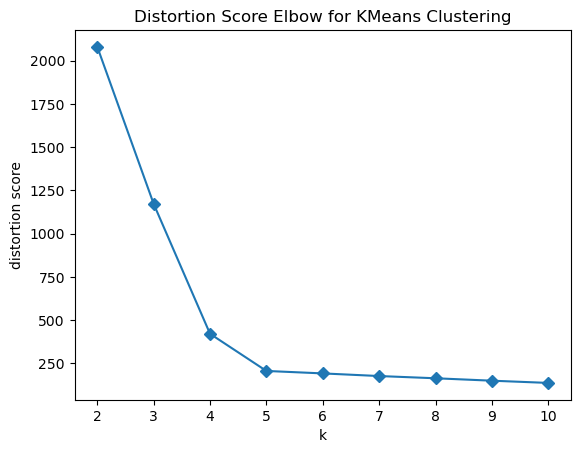

In [37]:
# First, we check the Elbow methodology using distortion scoring:
kelbow_plot = KElbowVisualizer(
    estimator = KMeans(random_state = 2022),
    k = 10,
    timings = False,
    locate_elbow = False
)
kelbow_plot.fit(projections_std)
kelbow_plot.show();

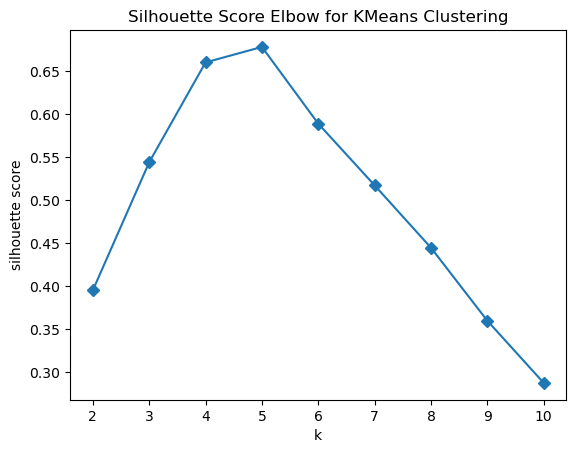

In [38]:
# Now, we check the Elbow methodology using Silhouette Score:
sil_plot = KElbowVisualizer(
    estimator = KMeans(random_state = 2022),
    k = 10,
    timings = False,
    metric = 'silhouette',
    locate_elbow = False
)
sil_plot.fit(projections_std)
sil_plot.show();

In [39]:
# Silhouette score for each number of clusters:
for i in range(2,20):
    labels = cluster.KMeans(n_clusters=i,init="k-means++", random_state = 2022).fit(projections_std).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(projections_std, labels, metric = "euclidean", sample_size = 1000, random_state = 2022)))

Silhouette score for k(clusters) = 2 is 0.395362954912102
Silhouette score for k(clusters) = 3 is 0.5440971241862844
Silhouette score for k(clusters) = 4 is 0.6600989346960412
Silhouette score for k(clusters) = 5 is 0.6780989030385338
Silhouette score for k(clusters) = 6 is 0.5889363019431967
Silhouette score for k(clusters) = 7 is 0.5172570394729279
Silhouette score for k(clusters) = 8 is 0.44475413051832435
Silhouette score for k(clusters) = 9 is 0.35997902043863644
Silhouette score for k(clusters) = 10 is 0.28778624104148665
Silhouette score for k(clusters) = 11 is 0.2836217749674811
Silhouette score for k(clusters) = 12 is 0.27792259663698043
Silhouette score for k(clusters) = 13 is 0.2728383471634117
Silhouette score for k(clusters) = 14 is 0.26251580649059586
Silhouette score for k(clusters) = 15 is 0.2565059670049289
Silhouette score for k(clusters) = 16 is 0.24590677948412104
Silhouette score for k(clusters) = 17 is 0.2646239825214753
Silhouette score for k(clusters) = 18 is 0.

In [40]:
# Therefore, 5 clusters will be chosen, as this maximizes our Silhouette score = 0.678.

In [41]:
# The model is fitted using KMeans method for 5 clusters:
km_model = KMeans(n_clusters = 5)

In [42]:
# A pipeline function is created that considers its 2 main components:
pipeline_pca_2 = make_pipeline(
    StandardScaler(),
    PCA(n_components = 2, random_state = 2022)
)
pipeline_pca_2.fit(X_cluster)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2, random_state=2022))])

In [43]:
# The projections obtained are standardized and stored:
projections_pca2 = pipeline_pca_2.transform(X_cluster)
projections_std_pca2 = scaler.fit_transform(projections_pca2)
projections_std_pca2

array([[-0.20689143,  1.21464137],
       [-0.36803279, -0.56190066],
       [-0.62164349, -0.33486894],
       ...,
       [-0.51295722, -0.43618034],
       [ 1.66835713, -1.03000512],
       [-0.96535749, -1.64926866]])

In [44]:
# These projections are fitted using K-means
km_model.fit(projections_std_pca2)

KMeans(n_clusters=5)

<AxesSubplot:>

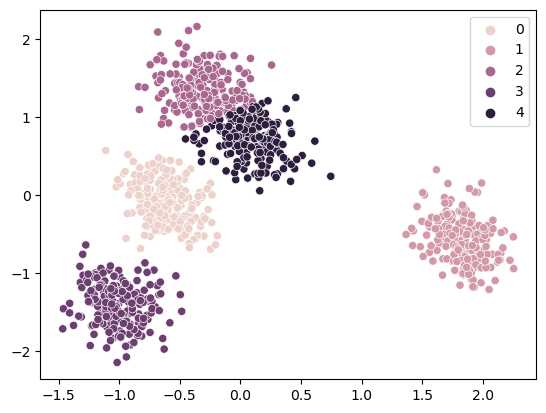

In [47]:
# Graphically:
import seaborn as sns
sns.scatterplot(
    x = projections_std_pca2[:, 0],
    y = projections_std_pca2[:, 1],
    hue = km_model.predict(projections_std_pca2.astype(str))
)

<AxesSubplot:>

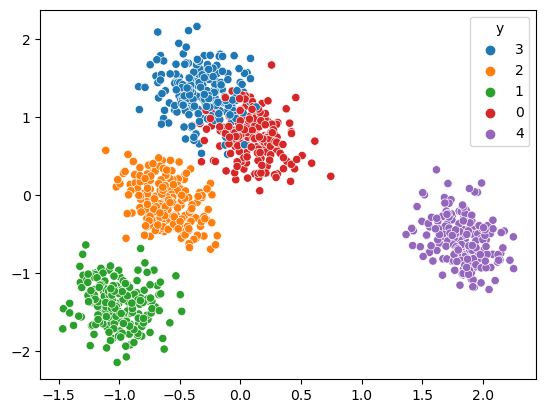

In [48]:
# The obtained clusters are compared with the real labels:
sns.scatterplot(
    x = projections_std_pca2[:, 0],
    y = projections_std_pca2[:, 1],
    hue = y_cluster.astype(str))

In [49]:
# When comparing both graphs, it can be concluded that the methodology applied was adequate.
# The clusters obtained coincide well with the real groups.
# there are some identification errors between clusters y = 3 and y = 0, being these two the most similar groups.